In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pymannkendall as mk
import matplotlib.pyplot as plt
import matplotlib
#import statsmodels.api as sm
%matplotlib inline
import glob
import os
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go

C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
# combining the dataframes
# defining the function arguments for data processing
path = r"D:\Work\Box Sync\Trends_all states\Population_DP05\\"
pattern = "ACSDP5Y" + "*.DP05-Data.csv" # file name pattern to list and read them
colNames10_12 = ['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
        'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
        'Percent!!HISPANIC OR LATINO AND RACE!!Hispanic or Latino (of any race)',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!White alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Black or African American alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Asian alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Some other race alone',
        'Percent!!HISPANIC OR LATINO AND RACE!!Not Hispanic or Latino!!Two or more races']
colNames13_16 =['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

colNames17_18 = ['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population', 
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
'Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

colNames19_20 =['Geography', 'Geographic Area Name', 'Estimate!!SEX AND AGE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!American Indian and Alaska Native alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Asian alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Some other race alone',
       'Percent!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Two or more races']

newNames = ['GEOID', 'NAME', 'Total population', 'Hispanic or Latino',  'White alone','Black or African American alone',
        'American Indian and Alaska Native alone', 'Asian alone', 'Native Hawaiian and Other Pacific Islander alone',
        'Some other race alone', 'Two or more races']
# List of the files that match the pattern
population_files = glob.glob(path + pattern) # listing file names with the pattern


In [3]:
# pd.read_csv(r'D:\Work\Box Sync\Trends_all states\Population_DP05\ACSDP5Y2017.DP05-Data.csv', 
#             index_col = None, 
#             usecols = colNames13_20,

#             header = 1)

In [4]:
# the file has two headers, deleting the 2nd header and renaming columns to more understandable form
files_map1 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames10_12, 
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[:3])

files10_12 = list(files_map1)
for i in range(len(files10_12)):
    globals()[f"df_{i}"] = files10_12[i]
    

files_map2 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames13_16,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[3:7])

files13_16 = list(files_map2)
for i in range(len(files13_16)):
    globals()[f"df_{i+3}"] = files13_16[i]
    
    
files_map3 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames17_18,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[7:9])
files17_18 = list(files_map3)
for i in range(len(files17_18)):
    globals()[f"df_{i+7}"] = files17_18[i]


files_map4 = map(lambda filename: pd.read_csv(filename, index_col = None, 
                                             usecols = colNames19_20,
                                             # names = newNames,
                                             header = 1, engine='python'), population_files[9:])

files19_20 = list(files_map4)
for i in range(len(files19_20)):
    globals()[f"df_{i+9}"] = files19_20[i]

In [5]:
df = df_0.merge(df_1.merge(df_2.merge(df_3.merge(df_4.merge(df_5.merge(df_6.merge(df_7.merge(df_8.merge(df_9.merge(df_10,
                                                                                                              on = 'Geography' , how = 'outer', suffixes = ('_19', '_20')),  
                                                                                                    on = 'Geography' , how = 'outer', suffixes = ('_18', '_19')),  
                                                                                         on = 'Geography' , how = 'outer', suffixes = ('_17', '_18')),  
                                                                              on = 'Geography' , how = 'outer', suffixes = ('_16', '_17')),  
                                                                   on = 'Geography' , how = 'outer', suffixes = ('_15', '_16')),  
                                                        on = 'Geography' , how = 'outer', suffixes = ('_14', '_15')), 
                                            on = 'Geography' , how = 'outer', suffixes = ('_13', '_14')), 
                                 on = 'Geography' , how = 'outer', suffixes = ('_12', '_13')), 
                      on = 'Geography' , how = 'outer', suffixes = ('_11', '_12')), 
                on = 'Geography', how = 'outer', suffixes=('_10', '_11'))


In [6]:
df.replace('-', np.nan, inplace = True)

In [7]:
num_cols = df[df.columns[df.columns.to_series().str.contains('HISPANIC OR LATINO AND RACE')]].columns
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
#df.dtypes

In [8]:
# df[df.columns[df.columns.to_series().str.contains('HISPANIC OR LATINO AND RACE')]].columns

In [9]:
#df.columns
# 'Hispanic or Latino'
df['Total']= df[df.columns[df.columns.to_series().str.contains('Estimate!!SEX AND AGE!!Total population')]].values.tolist()
df['Hispanic or Latino']= df[df.columns[df.columns.to_series().str.contains('(of any race)')]].values.tolist()
df['White']= df[df.columns[df.columns.to_series().str.contains('White alone')]].values.tolist()
df['Black or African American']= df[df.columns[df.columns.to_series().str.contains('Black or African American alone')]].values.tolist()
df['American Indian and Alaska Native']= df[df.columns[df.columns.to_series().str.contains('American Indian and Alaska Native alone')]].values.tolist()
df['Asian']= df[df.columns[df.columns.to_series().str.contains('Asian alone')]].values.tolist()
df['Native Hawaiian and Other Pacific Islander']= df[df.columns[df.columns.to_series().str.contains('Native Hawaiian and Other Pacific Islander alone')]].values.tolist()
df['Some Other Race']= df[df.columns[df.columns.to_series().str.contains('Some other race alone')]].values.tolist()
df['Two or more races']= df[df.columns[df.columns.to_series().str.contains('Two or more races')]].values.tolist()


C:\Users\uttar\AppData\Local\Temp\ipykernel_16104\2761776754.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['Hispanic or Latino']= df[df.columns[df.columns.to_series().str.contains('(of any race)')]].values.tolist()


In [10]:
df.loc[:, 'Hispanic or Latino_10_16'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Hispanic or Latino_17_20'] = df['Hispanic or Latino'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'White_10_16'] = df['White'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'White_17_20'] = df['White'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Black or African American_10_16'] = df['Black or African American'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Black or African American_17_20'] = df['Black or African American'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'American Indian and Alaska Native_10_16'] = df['American Indian and Alaska Native'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'American Indian and Alaska Native_17_20'] = df['American Indian and Alaska Native'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Asian_10_16'] = df['Asian'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Asian_17_20'] = df['Asian'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Native Hawaiian and Other Pacific Islander_10_16'] = df['Native Hawaiian and Other Pacific Islander'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Native Hawaiian and Other Pacific Islander_17_20'] = df['Native Hawaiian and Other Pacific Islander'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Some Other Race_10_16'] = df['Some Other Race'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Some Other Race_17_20'] = df['Some Other Race'].map(lambda x: np.mean(x[-4:]))

df.loc[:, 'Two or more races_10_16'] = df['Two or more races'].map(lambda x: np.mean(x[:-4]))
df.loc[:, 'Two or more races_17_20'] = df['Two or more races'].map(lambda x: np.mean(x[-4:]))

In [11]:
df['GEOID'] = df['Geography'].str[9:]

In [12]:
# df[['GEOID', 'Geographic Area Name', 'Hispanic or Latino', 'White', 'Black or African American',]]
#        'American Indian and Alaska Native', 'Asian',
#        'Native Hawaiian and Other Pacific Islander', 'Some Other Race',
#        'Two or more races', 'Total']]

In [13]:
places_US =  gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\compiled.shp')
df_with_geom = places_US.merge(df, on = 'GEOID')

In [14]:
# # metropolitan statistical area immigration data 
# run once to create the shapefile
# ============================================================================================
# msa_2021 = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2021_us_cbsa.zip')

# immigration_data = pd.read_csv(r'D:\Work\Box Sync\Trends_all states\Immigration data MPI\MPI_Immigration_data_2017_2021.csv')

# msa_immigration = msa_2021.merge(immigration_data, left_on = 'NAME', right_on = 'Metro')

# msa_immigration['Imm% tot pop'] = msa_immigration['Imm% tot pop'].str.rstrip('%').astype('float')
# msa_immigration['Metro N Imm'] = [float(str(i).replace(",", "")) for i in msa_immigration['Metro N Imm']]
# msa_immigration['Round immigrants'] = [float(str(i).replace(",", "")) for i in msa_immigration['Round immigrants']]
# msa_immigration['Round total MSA population'] = [float(str(i).replace(",", "")) for i in msa_immigration['Round total MSA population']]
# msa_immigration['Total Imm Pop_R'] = [float(str(i).replace(",", "")) for i in msa_immigration['Total Imm Pop_R']]

# msa_immigration.rename(columns={'Imm% tot pop': '%ImmPop',
#                                 'Metro N Imm': 'noImm',
#                                 'Round total MSA population': 'msa_total',}, inplace=True)

In [15]:
immigration_data = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\immigration_data.shp')

In [16]:
# df_comb.plot()
US_states = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2020_us_state.zip')
US_500cities = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\500Cities_City_11082016.zip')
US_urban = gpd.read_file(r'D:\Work\Box Sync\Trends_all states\Maps_2020\tl_2022_us_uac10.zip')

In [17]:
US_500cities = US_500cities.to_crs('EPSG:9311')
US_urban =US_urban.to_crs('EPSG:9311')

In [18]:
df1 = df_with_geom.to_crs('EPSG:9311') # [df_with_geom['STATEFP'].str.contains('30')]
df2 = immigration_data.to_crs('EPSG:9311') # [immigration_data['Metro'].str.contains('MT')]

df3 = df1.overlay(df2, how='intersection')

# fig, ax = plt.subplots(figsize=(20, 20))
# #df1.plot(ax = ax, alpha = 0.6)
# df2.plot(ax= ax, alpha = 0.5)
# df3.plot(ax= ax, alpha = 0.5, color = 'red')

C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\geopandas\geodataframe.py:2196: UserWarning: `keep_geom_type=True` in overlay resulted in 12130 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


In [19]:
df3.columns[160:]

Index(['Two or more races_17_20', 'CSAFP', 'CBSAFP', 'GEOID_2', 'Metro',
       'NAMELSAD_2', 'LSAD_2', 'MEMI', 'MTFCC_2', 'ALAND_2', 'AWATER_2',
       'INTPTLAT_2', 'INTPTLON_2', 'Origin', '%ImmPop', 'noImm', 'msa_total',
       'geometry'],
      dtype='object')

In [20]:
df3['%c_Hispanic'] = df3['Hispanic or Latino_17_20']- df3['Hispanic or Latino_10_16']
df3['%c_Asian'] = df3['Asian_17_20'] - df3['Asian_10_16']
df3['%c_White'] = df3['White_17_20'] - df3['White_10_16']
df3['%c_Black'] = df3['Black or African American_17_20'] - df3['Black or African American_10_16']
df3['%c_NH'] = df3['Native Hawaiian and Other Pacific Islander_17_20'] - df3['Native Hawaiian and Other Pacific Islander_10_16']
df3['%c_American Indian'] = df3['American Indian and Alaska Native_17_20'] - df3['American Indian and Alaska Native_10_16']
df3['%c_Some Other'] = df3['Some Other Race_17_20'] - df3['Some Other Race_10_16']
df3['%c_Two or more'] = df3['Two or more races_17_20'] - df3['Two or more races_10_16']

In [21]:
# df3[['NAME', 'Metro','%ImmPop','Hispanic or Latino_10_16','Hispanic or Latino_17_20', '%c_Hispanic', 
#      'Asian_10_16','Asian_17_20', '%c_Asian']].sort_values(['%c_Hispanic'], ascending = False).head(653)

In [22]:
df3['intersect_area'] = df3.area
df3['%area'] = df3['intersect_area']*100/df3['ALAND_1']

In [23]:
# fig, ax = plt.subplots(figsize=(20, 20))
# US_states.to_crs('EPSG:9311').boundary.plot(ax =ax, edgecolor = 'grey', linewidth = 0.4)
# US_urban.to_crs('EPSG:9311').plot(ax =ax, color = 'skyblue', linewidth = 0.2, alpha = 0.5, legend = True)
# immigration_data.to_crs('EPSG:9311').boundary.plot(ax= ax, color ='red', alpha = 1, linewidth = 0.4)
# df3[(df3['%c_Asian'] >5) & (df3['%ImmPop'] >0)].to_crs('EPSG:9311').plot(ax = ax, alpha = 1, color = 'darkgreen', linewidth = 1, legend = True)
# df3[(df3['%c_Hispanic'] >5) & (df3['%ImmPop'] >0)].to_crs('EPSG:9311').plot(ax = ax, alpha = 1, color = 'darkgreen', linewidth = 1, legend = True)

# xlim = ([-2257388.37, 2695859.75]) 
# ylim = ([-2246944.04, 918095.9])
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

# # Add title and legend to plot
# # ax.legend()
# ax.set(title='Cities with higher international immigration inside Metro areas')
# ax.set_axis_off()

# plt.show()

# fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\Cities with higher international immigration inside Metro areas.png', dpi = 300,
#            bbox_inches='tight', transparent="True", pad_inches=0)

In [24]:
# df000 = df3[(df3['%c_Hispanic'] >5) & (df3['%ImmPop'] >0)]
# df000[df000['STATEFP'] =='17']['NAME'].sort_values().unique()


In [25]:
df3[['STATEFP', 'PLACEFP', 'PLACENS', 'GEOID_1', 'NAME', 'NAMELSAD_1', 'Metro','%ImmPop',
       'noImm', 'msa_total', 'geometry', '%c_Hispanic', '%c_Asian',
       'intersect_area', '%area', '%c_White', '%c_Black', '%c_NH',
       '%c_American Indian', '%c_Some Other', '%c_Two or more']].to_csv(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\racial_distn.csv')

In [26]:
X = df3[['%ImmPop', 'Hispanic or Latino_17_20', 'Asian_17_20',
     'Some Other Race_17_20', 'Two or more races_17_20',]]
# '%c_Hispanic',
#        '%c_Asian', 'intersect_area', '%area', '%c_White', '%c_Black', '%c_NH',
#        '%c_American Indian', '%c_Some Other', '%c_Two or more']]

C:\Users\uttar\anaconda3\envs\geopandasenv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[Text(0.5, 1.0, 'Depop data T-SNE projection')]

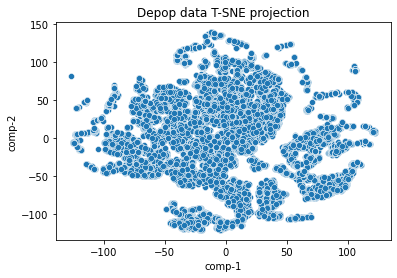

In [27]:
from sklearn import (manifold, datasets, decomposition, ensemble,
            discriminant_analysis, random_projection)
from time import time

X = X.fillna(0)

n_samples, n_features = X.shape
n_neighbors = 4

# source: https://www.datatechnotes.com/2020/11/tsne-visualization-example-in-python.html
# trying tsne on depopulating variables since tsne captures non linear relationship
tsne = manifold.TSNE(n_components=2, perplexity=35, early_exaggeration=12.0, learning_rate=200, 
                      n_iter=2000, n_iter_without_progress=300, min_grad_norm=1e-07, 
                      metric='euclidean', verbose=0)
t0 = time()
z = tsne.fit_transform(X)
df_tsne = pd.DataFrame()
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]
#df['trend'] = y

sns.scatterplot(x="comp-1", y="comp-2", data=df_tsne).set(title="Depop data T-SNE projection") 

In [28]:
X.columns

Index(['%ImmPop', 'Hispanic or Latino_17_20', 'Asian_17_20',
       'Some Other Race_17_20', 'Two or more races_17_20'],
      dtype='object')

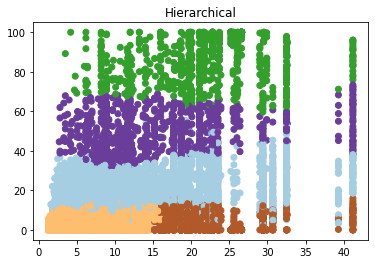

In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering
def hier(X, n_clusters):
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

hier(X, 5)

Text(0.5, 1.0, 'DBSCAN')

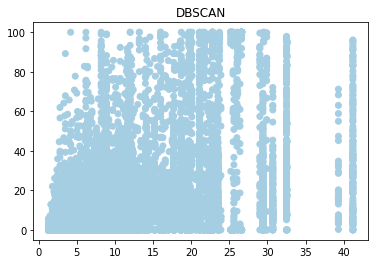

In [30]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=125, min_samples=5)
y_pred = db.fit_predict(X)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True

plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")



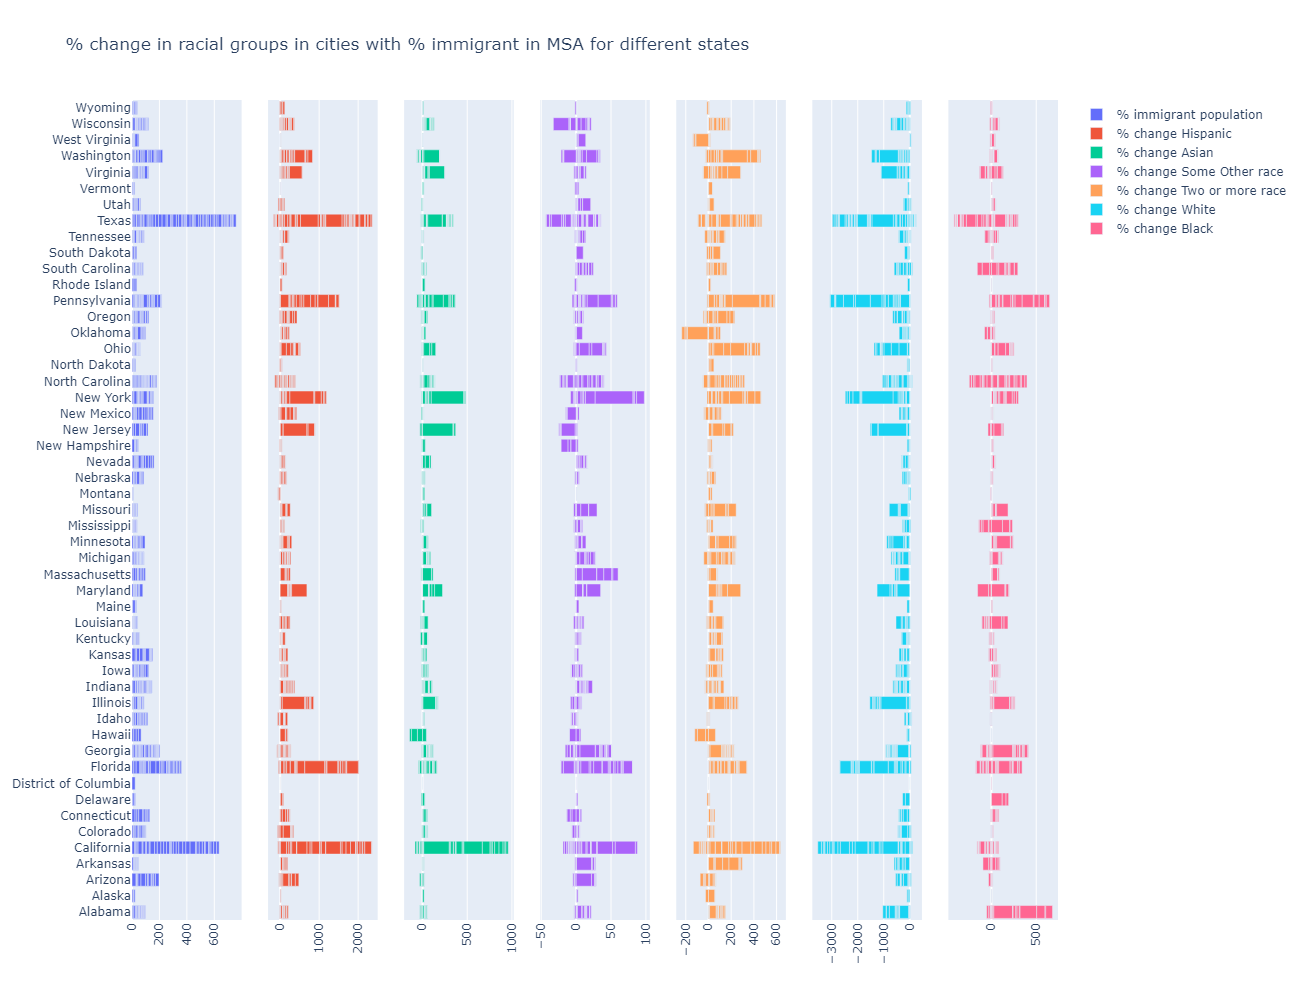

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# import plotly.io as pio
# pio.kaleido.scope.default_format = "png"

state_names= US_states[['STATEFP', 'NAME']]

data = df3.groupby(['STATEFP', 'Metro'])[['%c_Hispanic','%c_Asian', '%c_White', '%c_Black', '%c_NH',
                                                           '%c_American Indian', '%c_Some Other',
                                                           '%c_Two or more',]].sum().reset_index()
data['%immigrant'] = df3.groupby(['STATEFP', 'Metro'])[['%ImmPop']].mean().values#.groupby(['STATEFP']).sum().values
data = data.merge(state_names, on = 'STATEFP')

#data = data.sort_values(['%immigrant'])
x = data['NAME']

fig = make_subplots(rows=1, cols=7,
                   shared_yaxes=True)

# for i,s in enumerate(data.columns[2:11]):
#     dfs = df.query('species == @s')
#     fig.add_trace(go.bar(
#         name=s,
#         x=dfs[s],
#         y = dfs['NAME']
#         # offsetgroup=0,
#         orientation='h'
#         ), 
#                   row=1, col=i+1)


fig.append_trace(go.Bar(
            name='% immigrant population',
            x=data['%immigrant'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=1)

fig.append_trace( go.Bar(
            name="% change Hispanic",
            x=data['%c_Hispanic'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=2)

fig.append_trace(go.Bar(
            name="% change Asian",
            x=data['%c_Asian'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=3)

fig.append_trace(go.Bar(
            name='% change Some Other race',
            x=data['%c_Some Other'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=4)


fig.append_trace(go.Bar(
            name='% change Two or more race',
            x=data['%c_Two or more'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=5)

fig.append_trace(go.Bar(
            name='% change White',
            x=data['%c_White'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=6)

fig.append_trace(go.Bar(
            name='% change Black',
            x=data['%c_Black'],
            y=x,
            offsetgroup=0,
            orientation='h'
        ), row=1, col=7)

fig.update_xaxes(tickangle= -90)  
fig.update_layout(height=1000, width=1200, 
                  title_text="% change in racial groups in cities with % immigrant in MSA for different states")
fig.show()

fig.write_html(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\pct racial groups with pct immigrant in MSA.html')
# !pip install -U kaleido
# fig.write_image(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\pct racial groups with pct immigrant in MSA.png')

In [32]:
df3[df3['%c_Hispanic'] * df3['%ImmPop'] > 10][['STATEFP', 'GEOID_1', 'NAMELSAD_1', 'Metro', 
     'Hispanic or Latino_17_20', 'Asian_17_20',
     'Some Other Race_17_20', 'Two or more races_17_20',
     '%c_Hispanic', '%c_Asian', '%c_Some Other', '%c_Two or more',
     '%ImmPop',]].sort_values('%c_Hispanic')
# df3[df3['%c_Hispanic'] * df3['%ImmPop'] > 10].shape, df3[df3['%c_Asian'] * df3['%ImmPop'] > 10].shape

STATEFP  GEOID_1        NAMELSAD_1  \
2911       06  0643280    Los Altos city   
2898       06  0629504       Gilroy city   
3965       34  3458200  Perth Amboy city   
4281       34  3454315   Ocean Acres CDP   
4669       36  3653561     North Sea CDP   
...       ...      ...               ...   
16671      41  4150200    Mount Hood CDP   
16315      41  4166900         Shedd CDP   
1489       35  3537910   Lake Valley CDP   
5879       12  1246725     Morriston CDP   
13386      35  3541970    Loco Hills CDP   

                                       Metro  Hispanic or Latino_17_20  \
2911      San Jose-Sunnyvale-Santa Clara, CA                     4.650   
2898      San Jose-Sunnyvale-Santa Clara, CA                    58.875   
3965   New York-Newark-Jersey City, NY-NJ-PA                    79.600   
4281   New York-Newark-Jersey City, NY-NJ-PA                     5.250   
4669   New York-Newark-Jersey City, NY-NJ-PA                    12.450   
...                                      ...                       ...   
16671                         Hood River, OR                    82.625   
16315                     Albany-Lebanon, OR                    65.725   
1489                          Farmington, NM                    61.925   
5879                         Gainesville, FL                    82.400   
13386                   Carlsbad-Artesia, NM                   100.000   

       Asian_17_20  Some Other Race_17_20  Two or more races_17_20  \
2911        30.350                  0.425                    5.075   
2898         8.650                  0.025                    2.625   
3965         1.225                  0.275                    0.325   
4281         0.550                  0.100                    2.575   
4669         2.150                  0.000                    0.000   
...            ...                    ...                      ...   
16671        0.000                  0.000                    0.000   
16315        0.000                  0.000                    0.000   
1489         0.000                  0.000                    1.050   
5879         0.000                  0.000                    0.000   
13386        0.000                  0.000                    0.000   

       %c_Hispanic  %c_Asian  %c_Some Other  %c_Two or more  %ImmPop  
2911      0.292857  6.392857       0.082143        0.175000     39.3  
2898      0.303571  2.892857       0.025000        0.939286     39.3  
3965      0.342857 -0.403571       0.117857       -0.246429     29.4  
4281      0.350000  0.164286      -0.142857        2.189286     29.4  
4669      0.350000  0.735714       0.000000       -0.428571     29.4  
...            ...       ...            ...             ...      ...  
16671    59.139286  0.000000       0.000000        0.000000     15.6  
16315    61.767857  0.000000       0.000000       -5.842857      4.0  
1489     61.925000  0.000000       0.000000        1.050000      2.8  
5879     77.071429  0.000000       0.000000        0.000000      9.6  
13386    95.157143  0.000000       0.000000      -10.114286      6.2  

[6935 rows x 13 columns]

In [33]:
df3[df3['%c_Asian'] * df3['%ImmPop'] > 10][['STATEFP', 'GEOID_1', 'NAMELSAD_1', 'Metro', 
     'Hispanic or Latino_17_20', 'Asian_17_20',
     'Some Other Race_17_20', 'Two or more races_17_20',
     '%c_Hispanic', '%c_Asian', '%c_Some Other', '%c_Two or more',
     '%ImmPop',]].sort_values('%c_Asian')

STATEFP  GEOID_1             NAMELSAD_1  \
5822       12  1247700            Naranja CDP   
5849       12  1276290           Westgate CDP   
5816       12  1236121       Kendall West CDP   
5776       12  1226250      Golden Beach town   
5701       12  1239525  Lauderdale Lakes city   
...       ...      ...                    ...   
5535       51  5113624            Catlett CDP   
12928      32  3227900          Glenbrook CDP   
3097       32  3227900          Glenbrook CDP   
2415       06  0651622      Norris Canyon CDP   
3086       06  0672492       Soda Springs CDP   

                                              Metro  Hispanic or Latino_17_20  \
5822        Miami-Fort Lauderdale-Pompano Beach, FL                    57.975   
5849        Miami-Fort Lauderdale-Pompano Beach, FL                    50.475   
5816        Miami-Fort Lauderdale-Pompano Beach, FL                    90.950   
5776        Miami-Fort Lauderdale-Pompano Beach, FL                    35.250   
5701        Miami-Fort Lauderdale-Pompano Beach, FL                     4.575   
...                                             ...                       ...   
5535   Washington-Arlington-Alexandria, DC-VA-MD-WV                     0.000   
12928                               Carson City, NV                     0.000   
3097                       Gardnerville Ranchos, NV                     0.000   
2415             San Francisco-Oakland-Berkeley, CA                     8.025   
3086                       Truckee-Grass Valley, CA                     0.000   

       Asian_17_20  Some Other Race_17_20  Two or more races_17_20  \
5822         1.900                  0.000                    2.500   
5849         2.600                  0.000                    0.375   
5816         1.900                  0.200                    0.325   
5776         1.100                  0.325                    0.000   
5701         1.775                  0.050                    1.850   
...            ...                    ...                      ...   
5535        30.675                  0.000                    0.000   
12928       31.950                  0.000                    0.000   
3097        31.950                  0.000                    0.000   
2415        69.925                  0.000                    4.500   
3086        50.000                  0.000                    0.000   

       %c_Hispanic   %c_Asian  %c_Some Other  %c_Two or more  %ImmPop  
5822     10.089286   0.242857      -0.228571       -0.057143     41.2  
5849      9.817857   0.257143      -0.414286       -0.639286     41.2  
5816      2.950000   0.257143       0.085714       -0.132143     41.2  
5776      3.707143   0.257143       0.239286       -0.200000     41.2  
5701     -1.667857   0.260714      -0.092857        0.178571     41.2  
...            ...        ...            ...             ...      ...  
5535      0.000000  30.146429       0.000000        0.000000     22.9  
12928    -3.257143  31.950000       0.000000        0.000000     12.8  
3097     -3.257143  31.950000       0.000000        0.000000      6.4  
2415      6.539286  32.339286      -0.728571        0.914286     30.7  
3086      0.000000  50.000000       0.000000        0.000000      6.1  

[3027 rows x 13 columns]

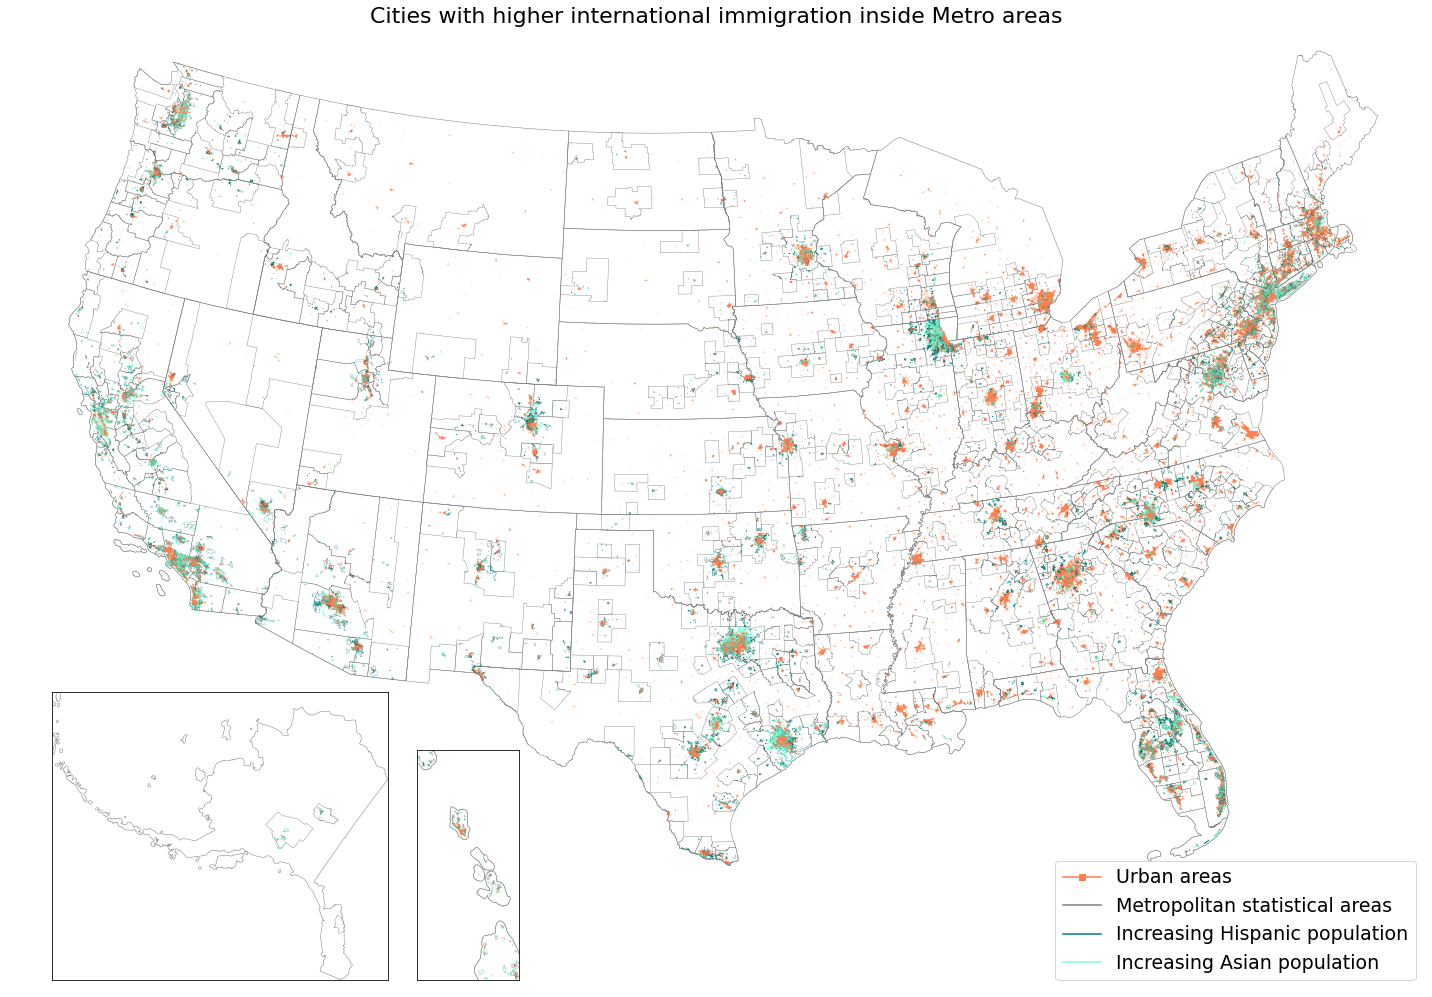

In [34]:
# fig, ax = plt.subplots(figsize=(20, 20))
# create an axis with 2 insets − this defines the inset sizes
df_plot = df3#.set_index('STATEFP')

# create an axis with 2 insets − this defines the inset sizes
fig, continental_ax = plt.subplots(figsize=(20, 22))
alaska_ax = continental_ax.inset_axes([.01, .01, .28, .30])
hawaii_ax = continental_ax.inset_axes([.20, .01, .25, .24])

# Set bounds to fit desired areas in each plot
continental_ax.set_xlim(-2257388.37, 2695859.75)
continental_ax.set_ylim(-2546944.04, 808080.9)
#[-8532676.07614065, -3748050.80000724,  3754325.60307967, 4852777.56870515]
alaska_ax.set_xlim(-4383115.86156959, -1515327.22537998)
alaska_ax.set_ylim(1458524.37417163, 3919523.37426209)

hawaii_ax.set_xlim(-5722090.887043, -5462538.83170424)   # bounds found for only populated places in Hawaii
hawaii_ax.set_ylim(-1044618.58269969, -455238.37803499)
#[-6440340.62278472, -1056683.73964088, -5453622.10058784, 1580494.49019997] # total bounds for Hawaii

US_states.to_crs('EPSG:9311').boundary.plot(ax =continental_ax, edgecolor = 'grey', linewidth = 0.5)
US_urban.to_crs('EPSG:9311').plot(ax =continental_ax, color = 'coral', linewidth = 0.5)#, alpha = 0.8, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax= continental_ax, color ='gray', alpha = 1, linewidth = 0.4)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = continental_ax, 
                                                                                            alpha = 1, color = 'teal', 
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = continental_ax, 
                                                                                         alpha = 1, color = 'aquamarine', 
                                                                                         linewidth = 0.2)#, legend = True)

# xlim = ([-2257388.37, 2695859.75]) 
# ylim = ([-2246944.04, 918095.9])
# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

from matplotlib import lines
continental_ax.legend([lines.Line2D([0], [0], marker='s', ls='solid', c='coral'),
           lines.Line2D([0], [0], ls='solid', c='gray'),
           lines.Line2D([0], [0], ls='solid', c='teal'),
           lines.Line2D([0], [0], ls='solid', c='aquamarine')],
          ['Urban areas', 'Metropolitan statistical areas', 
           'Increasing Hispanic population', 'Increasing Asian population'],
         loc = 'lower right', fontsize = 19)

# Add title and legend to plot
# ax.legend()
continental_ax.set_title('Cities with higher international immigration inside Metro areas', fontdict={'fontsize': 22})
continental_ax.set_axis_off()



US_states.to_crs('EPSG:9311').boundary.plot(ax =alaska_ax, edgecolor = 'grey', linewidth = 0.5)
US_urban.to_crs('EPSG:9311').plot(ax =alaska_ax, color = 'coral', linewidth = 0.5)#, alpha = 0.8, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax= alaska_ax, color ='gray', alpha = 1, linewidth = 0.4)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = alaska_ax, 
                                                                                            alpha = 1, color = 'teal', 
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = alaska_ax, 
                                                                                         alpha = 1, color = 'aquamarine', 
                                                                                         linewidth = 0.2)#, legend = True)
# alaska_ax.set_axis_off()


US_states.to_crs('EPSG:9311').boundary.plot(ax =hawaii_ax, edgecolor = 'grey', linewidth = 0.5)
US_urban.to_crs('EPSG:9311').plot(ax =hawaii_ax, color = 'coral', linewidth = 0.5)#, alpha = 0.8, legend = True)
immigration_data.to_crs('EPSG:9311').boundary.plot(ax=hawaii_ax, color ='gray', alpha = 1, linewidth = 0.4)
df_plot[df_plot['%c_Hispanic'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = hawaii_ax, 
                                                                                            alpha = 1, color = 'teal',
                                                                                            linewidth = 0.2)#, legend = True)
df_plot[df_plot['%c_Asian'] * df_plot['%ImmPop'] > 10].to_crs('EPSG:9311').boundary.plot(ax = hawaii_ax, 
                                                                                         alpha = 1, color = 'aquamarine', 
                                                                                         linewidth = 0.2)#, legend = True)
# hawaii_ax.set_axis_off()

# remove ticks
for ax in [continental_ax, alaska_ax, hawaii_ax]:
    ax.set_yticks([])
    ax.set_xticks([])
    plt.tight_layout() 

plt.show()

fig.savefig(r'D:\Work\Box Sync\Trends_all states\Output from Analysis\Figures\Cities with higher international immigration.png', dpi = 300,
           bbox_inches='tight', transparent="True", pad_inches=0)

In [35]:
# # import the United States shape file
# # set state code as index, exclude states that we will never display
# gdf1 = df3[(df3['%c_Hispanic'] >5) & (df3['%ImmPop'] >0)].set_index('STATEFP')
# gdf2 = df3[(df3['%c_Asian'] >5) & (df3['%ImmPop'] >0)].set_index('STATEFP')

# #gdf = df_with_geom.to_crs('EPSG:9311').set_index('STATEFP') #.drop(index=['02', 'VI', 'MP', 'GU', 'AS'])

# # create an axis with 2 insets − this defines the inset sizes
# fig, continental_ax = plt.subplots(figsize=(20, 10))
# alaska_ax = continental_ax.inset_axes([.01, .01, .24, .24])
# hawaii_ax = continental_ax.inset_axes([.22, .01, .15, .20])

# # Set bounds to fit desired areas in each plot
# continental_ax.set_xlim(-2257388.37, 2695859.75)
# continental_ax.set_ylim(-2246944.04, 918095.9)

# alaska_ax.set_xlim(-4337634.21863075, -1564427.75408087)
# alaska_ax.set_ylim(1528047.16872635, 3883917.63673733)

# hawaii_ax.set_xlim(-5722090.887043, -5462538.83170424)
# hawaii_ax.set_ylim(-1050846.93031638, -455238.37803499)

# # Plot the data per area - requires passing the same choropleth parameters to each call
# # because different data is used in each call, so automatically setting bounds won’t work
# #vmin, vmax = df['ALAND'].agg(['min', 'max'])
# US_states.to_crs('EPSG:9311').plot(ax=continental_ax, facecolor = 'none', edgecolor='gray', linewidth=0.4)
# gdf1.drop(index=['02', '15']).plot(color = 'darkgreen',
#                                   ax=continental_ax,) #, vmin=vmin, vmax=vmax)
# gdf2.drop(index=['02', '15']).plot(color = 'darkgreen',
#                                   ax=continental_ax,)

# US_states.to_crs('EPSG:9311').plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=alaska_ax)
# gdf1.loc[['02']].plot(color = 'darkgreen', ax=alaska_ax)
# gdf2.loc[['02']].plot(color = 'darkgreen', ax=alaska_ax)#, vmin=vmin, vmax=vmax)
# US_states.to_crs('EPSG:9311').plot(facecolor = 'none', edgecolor='gray', linewidth=0.4, ax=hawaii_ax)
# gdf1.loc[['15']].plot(color = 'darkgreen', ax=hawaii_ax) #, vmin=vmin, vmax=vmax)
# gdf2.loc[['15']].plot(color = 'darkgreen', ax=hawaii_ax)
# # remove ticks
# for ax in [continental_ax, alaska_ax, hawaii_ax]:
#     ax.set_yticks([])
#     ax.set_xticks([])

In [36]:
# # get state names
# state_names= US_states[['STATEFP', 'NAME']]
# # Percent cities in each trend group
# # pd.set_option('display.max_rows', None)
# percent_cities = (df.groupby(['STATEFP', 'expected_trend_2']).count()[['GEOID']] /
#                   df.groupby(['STATEFP']).count()[['GEOID']]).reset_index()

# table = pd.pivot_table(percent_cities, values='GEOID', index=['STATEFP'], # 'expected_trend_3'
#                     columns=['expected_trend_2'], aggfunc=np.sum).reset_index()

# table = table.merge(state_names, on = 'STATEFP')
# # table['sum'] = table[['1 severely depopulating', '2 moderately depopulating','3 slowly depopulating']].sum(axis =1)
# table = table.sort_values('decreasing', ascending = False) 
# table.drop(columns = ['STATEFP'], inplace = True)

# colors = ['maroon','yellowgreen','slategray']
# # colors = ['red', 'maroon', 'indianred', 'darkorange', 'limegreen','forestgreen', 'darkgreen', 'gray']
# cmap=matplotlib.colors.ListedColormap(colors)

# # plot a Stacked Bar Chart using matplotlib
# ax = table.plot(
#     x = 'NAME',
#     kind = 'barh',
#     stacked = True,
#     cmap = cmap,
#     title = '% Cities with population trend',
#     mark_right = True,
#     figsize=(10, 15))
# # setting label sizes after creation
# ax.yaxis.label.set_size(15)
# ax.tick_params(axis='both', which='major', labelsize=12)
# ax.legend(bbox_to_anchor=(1.01, 1.00), loc='upper left', prop={'size': 15})
# plt.tight_layout()
# plt.show()

In [37]:
# df3[(df3['Asian_17_20'] >20) & (df3['%ImmPop'] >10)]

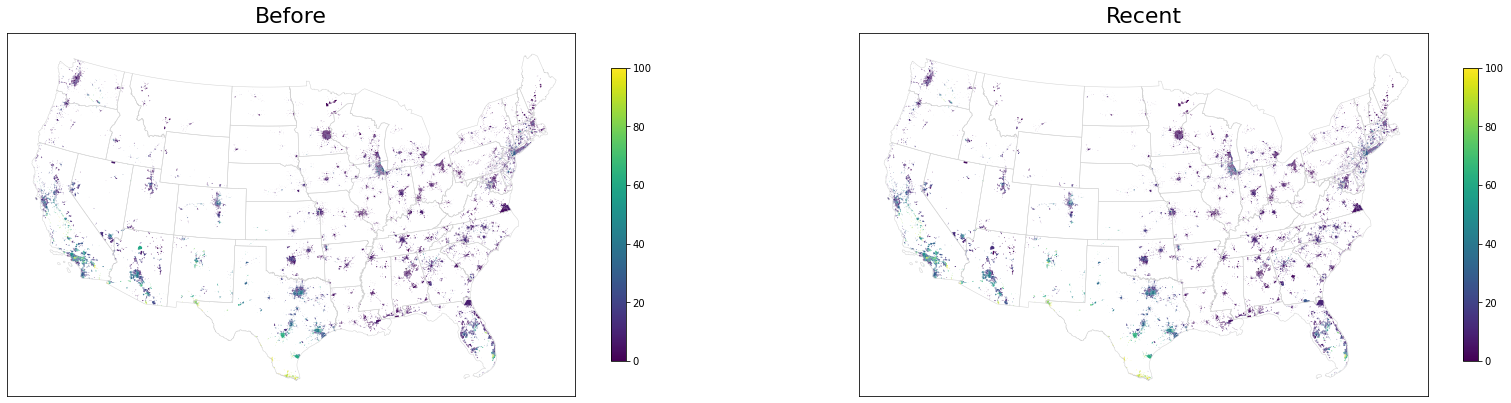

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(28,18))
column_names = ['Hispanic or Latino_10_16','Hispanic or Latino_17_20']
df_comb = df3 
title_dict = {column_names[0]: 'Before',
              column_names[1]:'Recent'}

for ax,col in zip(ax.flatten(), column_names):
    xlim = ([-2257388.37, 2695859.75]) 
    ylim = ([-2246944.04, 918095.9])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    #cmap_colors = matplotlib.colors.ListedColormap(colors)
    base = US_states.to_crs('EPSG:9311').boundary.plot(ax =ax, edgecolor = 'lightgray', linewidth = 0.5)
    df_comb.plot(ax =ax, column = col,  legend = True,legend_kwds={'shrink': 0.3})
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.set_title(title_dict.get(col), fontsize=22, pad=10)

In [39]:
# 'White alone' # df[df.columns[df.columns.to_series().str.contains('DP05_0072PE')]]
# # 'Black or African American alone', # df[df.columns[df.columns.to_series().str.contains('DP05_0073PE')]]
# # 'American Indian and Alaska Native alone' # df[df.columns[df.columns.to_series().str.contains('DP05_0074PE')]]
# # 'Asian alone', # df[df.columns[df.columns.to_series().str.contains('DP05_0075PE')]]
# # 'Native Hawaiian and Other Pacific Islander alone' # df[df.columns[df.columns.to_series().str.contains('DP05_0076PE')]]
# # 'Some Other Race alone' # df[df.columns[df.columns.to_series().str.contains('DP05_0077PE')]]
# # 'Two or more races' # df[df.columns[df.columns.to_series().str.contains('DP05_0078PE')]]

In [40]:
US_urban.shape, immigration_data.shape

((3601, 13), (570, 17))